In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

## Gathering Data

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(data.keys())
print(data.dtypes)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


## Clean data

In [4]:
# drop unused data
use_data = data.drop(['customerID'],axis=1)


# check null index in totalcharge
for index,x in enumerate(use_data['TotalCharges']):
    try:
        float(x)
    except ValueError:
        print("exception", x, index)
        
# drop unused row
use_data = use_data.drop(use_data.index[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]])
        
# convert to float
use_data["TotalCharges"] = use_data.TotalCharges.astype(float)

# show type
print(use_data.dtypes)

exception   488
exception   753
exception   936
exception   1082
exception   1340
exception   3331
exception   3826
exception   4380
exception   5218
exception   6670
exception   6754
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


## Explore Data

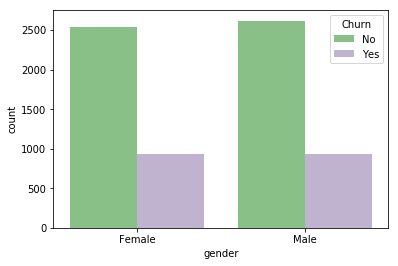

In [5]:
#gender
gender = pd.DataFrame(data={"gender": use_data['gender'],
                            "Churn": use_data['Churn']})

gend = sns.countplot(x='gender', hue='Churn', data=gender, palette="Accent")


# show that gender does not affect to churn

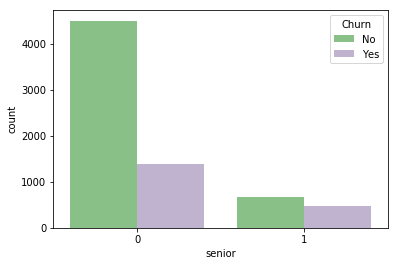

In [6]:
#senior
senior_citizen = pd.DataFrame(data={"senior": use_data['SeniorCitizen'],
                            "Churn": use_data['Churn']})

senior = sns.countplot(x='senior', hue='Churn', data=senior_citizen, palette="Accent")

# 1 is senior citizen, 0 is not

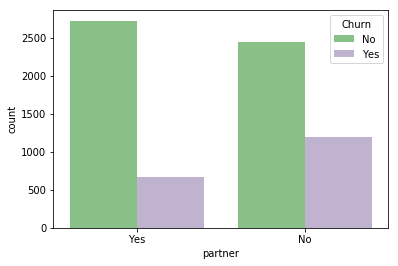

In [7]:
# Partner

partner = pd.DataFrame(data={"partner": use_data['Partner'],
                            "Churn": use_data['Churn']})

sns.countplot(x='partner', hue='Churn', data=partner, palette="Accent")

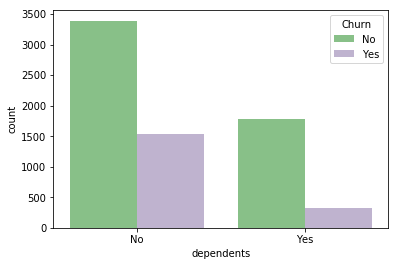

In [8]:
# Dependents

dependents = pd.DataFrame(data={"dependents": use_data['Dependents'],
                            "Churn": use_data['Churn']})

sns.countplot(x='dependents', hue='Churn', data=dependents, palette="Accent")

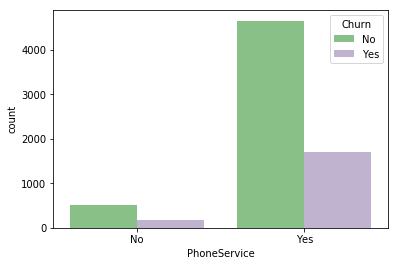

In [9]:
#PhoneService
phone_service = pd.DataFrame(data={"PhoneService": use_data['PhoneService'],
                                    "Churn": use_data['Churn']})

phone = sns.countplot(x='PhoneService', hue='Churn', data=phone_service, palette="Accent")

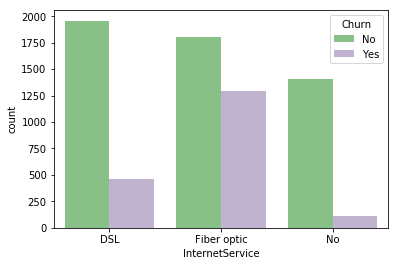

In [10]:
#InternetService
internet_service= pd.DataFrame(data={"InternetService": use_data['InternetService'],
                                    "Churn": use_data['Churn']})

internet = sns.countplot(x='InternetService', hue='Churn', data=internet_service, palette="Accent")

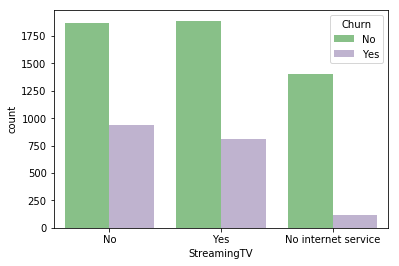

In [11]:
# StreamingTV
streaming_TV= pd.DataFrame(data={"StreamingTV": use_data['StreamingTV'],
                                    "Churn": use_data['Churn']})

streaming = sns.countplot(x='StreamingTV', hue='Churn', data=streaming_TV, palette="Accent")

## Convert Data

In [12]:
# drop more unused data
use_data = use_data.drop(['gender'],axis=1)

# set dict
yes_no = {'Yes': 1, 'No': 0}
multiple_lines = {'Yes': 2, 'No': 1, 'No phone service': 0}
internet = {'DSL': 2, 'Fiber optic': 1, 'No': 0}
online = {'Yes': 2, 'No' : 1, 'No internet service': 0}
contract = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
payment = {'Electronic check': 0, 'Mailed check': 1, 
           'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}

# convert
use_data['Partner'] = use_data['Partner'].map(yes_no)
use_data['Dependents'] = use_data['Dependents'].map(yes_no)
use_data['PhoneService'] = use_data['PhoneService'].map(yes_no)
use_data['MultipleLines'] = use_data['MultipleLines'].map(multiple_lines)
use_data['InternetService'] = use_data['InternetService'].map(internet)
use_data['OnlineSecurity'] = use_data['OnlineSecurity'].map(online)
use_data['OnlineBackup'] = use_data['OnlineBackup'].map(online)
use_data['DeviceProtection'] = use_data['DeviceProtection'].map(online)
use_data['TechSupport'] = use_data['TechSupport'].map(online)
use_data['StreamingTV'] = use_data['StreamingTV'].map(online)
use_data['StreamingMovies'] = use_data['StreamingMovies'].map(online)
use_data['Contract'] = use_data['Contract'].map(contract)
use_data['PaperlessBilling'] = use_data['PaperlessBilling'].map(yes_no)
use_data['PaymentMethod'] = use_data['PaymentMethod'].map(payment)
use_data['Churn'] = use_data['Churn'].map(yes_no)

print(use_data.dtypes)

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


## Split Data

In [13]:
train_data = use_data.drop(['Churn'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_data, use_data['Churn'])

## Make Prediction

In [14]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

In [15]:
print("score rf: ",rf.score(X_test,y_test))
print("mean rf: ", np.mean(pred_rf == y_test))

score rf:  0.800910125142207
mean rf:  0.800910125142207
